In [102]:
# inclua esse import no início do arquivo
import matplotlib.pyplot as plt
import numpy as np

def make_plot(data, groups, cs=None):
    plt.figure(figsize=(6, 6))
    plt.scatter(data[:,0], data[:,1], c=groups, alpha=0.5, s=100)
    if cs is not None:
        plt.scatter(
            cs[:,0], cs[:,1], c=np.arange(groups.max()+1),
            linewidth=30, marker='o', alpha=0.3, s=30
        )

    plt.title('agrupamento de dados')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [103]:
def group(data, k=2, max_iter=100):
    #PASSO 01: Gerar valores para os centroides dos grupos.
    xs = np.random.uniform(data[:, 0].min(), data[:, 0].max(), k)
    ys = np.random.uniform(data[:, 1].min(), data[:, 1].max(), k)
    cs = np.stack((xs, ys), axis=1)
    
    gs_ant = None
    while max_iter > 0:
        #PASSO 02: Gerar uma matriz de distância entre 0, 1, 0 cada ponto e os centroides.
        dist_mat = np.sqrt(
            np.square((data[:, np.newaxis, :] - cs[np.newaxis, :])).sum(axis=2)
        )

        #PASSO 03: Colocar cada ponto nas classes de acordo com a sua distância do
        #centroide da classe.
        gs = np.argmin(dist_mat, axis=1)
        
        #(gs_ant == gs).all()
        if (gs_ant is not None) and np.array_equal(gs_ant,  gs):
            break
        gs_ant = gs

        #PASSO 04: Calcular os novos centroides para cada classe.
        cs = np.array([data[gs == i].mean(axis=0) for i in range(k)])
        
        max_iter -= 1
    return gs, cs


In [104]:
n = 30
data = np.random.random((n, 2))

In [105]:
gs, cs = group(data, k=5)
gs

array([2, 2, 2, 4, 0, 1, 0, 3, 3, 1, 4, 0, 4, 0, 2, 0, 0, 0, 1, 0, 3, 0,
       0, 3, 0, 2, 3, 1, 0, 1])

In [106]:
gs.max()

4

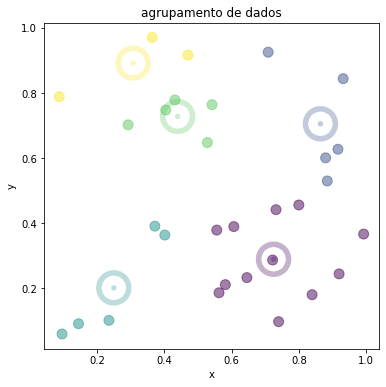

In [107]:
make_plot(data, groups=gs, cs=cs)

In [12]:
k = 3

In [4]:
data = np.random.random((8, 2))

In [5]:
data

array([[0.80653696, 0.42012131],
       [0.31661485, 0.62807292],
       [0.75574595, 0.0223149 ],
       [0.49720302, 0.56779593],
       [0.52639001, 0.52254086],
       [0.00610125, 0.2806471 ],
       [0.62453678, 0.94803938],
       [0.26240837, 0.6332835 ]])

In [24]:
# passo 1
xs = np.random.uniform(data[:, 0].min(), data[:, 0].max(), k)
ys = np.random.uniform(data[:, 1].min(), data[:, 1].max(), k)
cs = np.stack((xs, ys), axis=1)

In [28]:
data[:, np.newaxis, :].shape, cs[np.newaxis, :].shape

((8, 1, 2), (1, 3, 2))

In [27]:
(data - cs[0]).shape

(8, 2)

In [29]:
(data[:, np.newaxis, :] - cs[np.newaxis, :]).shape

(8, 3, 2)

In [37]:
# passo 2
dist_mat = np.sqrt(np.square((data[:, np.newaxis, :] - cs[np.newaxis, :])).sum(axis=2))

# passo 3
gs = np.argmin(dist_mat, axis=1)

# passo 4
np.array([data[gs == i].mean(axis=0) for i in range(k)])

In [56]:
data[gs == 0].mean(axis=0)

array([0.25165214, 0.42422151])

In [54]:
gs == 0

array([False, False, False,  True, False,  True, False, False])

In [55]:
data[gs == 0]

array([[0.49720302, 0.56779593],
       [0.00610125, 0.2806471 ]])

In [131]:
gs = np.argmin(np.random.random((8, 3)), axis=1)
gs

array([2, 0, 1, 1, 0, 0, 0, 2])

In [132]:
gs_ant = gs
gs_ant, gs

(array([2, 0, 1, 1, 0, 0, 0, 2]), array([2, 0, 1, 1, 0, 0, 0, 2]))

In [129]:
gs = np.argmin(np.random.random((8, 3)), axis=1)
gs

array([0, 0, 2, 0, 1, 2, 1, 1])

In [133]:
gs[0] = 1

In [134]:
gs_ant, gs

(array([1, 0, 1, 1, 0, 0, 0, 2]), array([1, 0, 1, 1, 0, 0, 0, 2]))